In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('House_price_prediction.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [3]:
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14620.0,6.762821e+09,6237.574799,6.762810e+09,6.762815e+09,6.762821e+09,6.762826e+09,6.762832e+09
Date,14620.0,4.260454e+04,67.347991,4.249100e+04,4.254600e+04,4.260000e+04,4.266200e+04,4.273400e+04
number of bedrooms,14620.0,3.379343e+00,0.938719,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
number of bathrooms,14620.0,2.129583e+00,0.769934,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living area,14620.0,2.098263e+03,928.275721,3.700000e+02,1.440000e+03,1.930000e+03,2.570000e+03,1.354000e+04
lot area,14620.0,1.509328e+04,37919.621304,5.200000e+02,5.010750e+03,7.620000e+03,1.080000e+04,1.074218e+06
number of floors,14620.0,1.502360e+00,0.540239,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront present,14620.0,7.660739e-03,0.087193,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
number of views,14620.0,2.331053e-01,0.766259,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition of the house,14620.0,3.430506e+00,0.664151,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
del df['id']
del df['Date']
del df['Renovation Year']

In [7]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,122005,52.9532,-114.321,3350,42847,3,76,838000
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,122006,52.9047,-114.485,2060,4500,1,51,805000


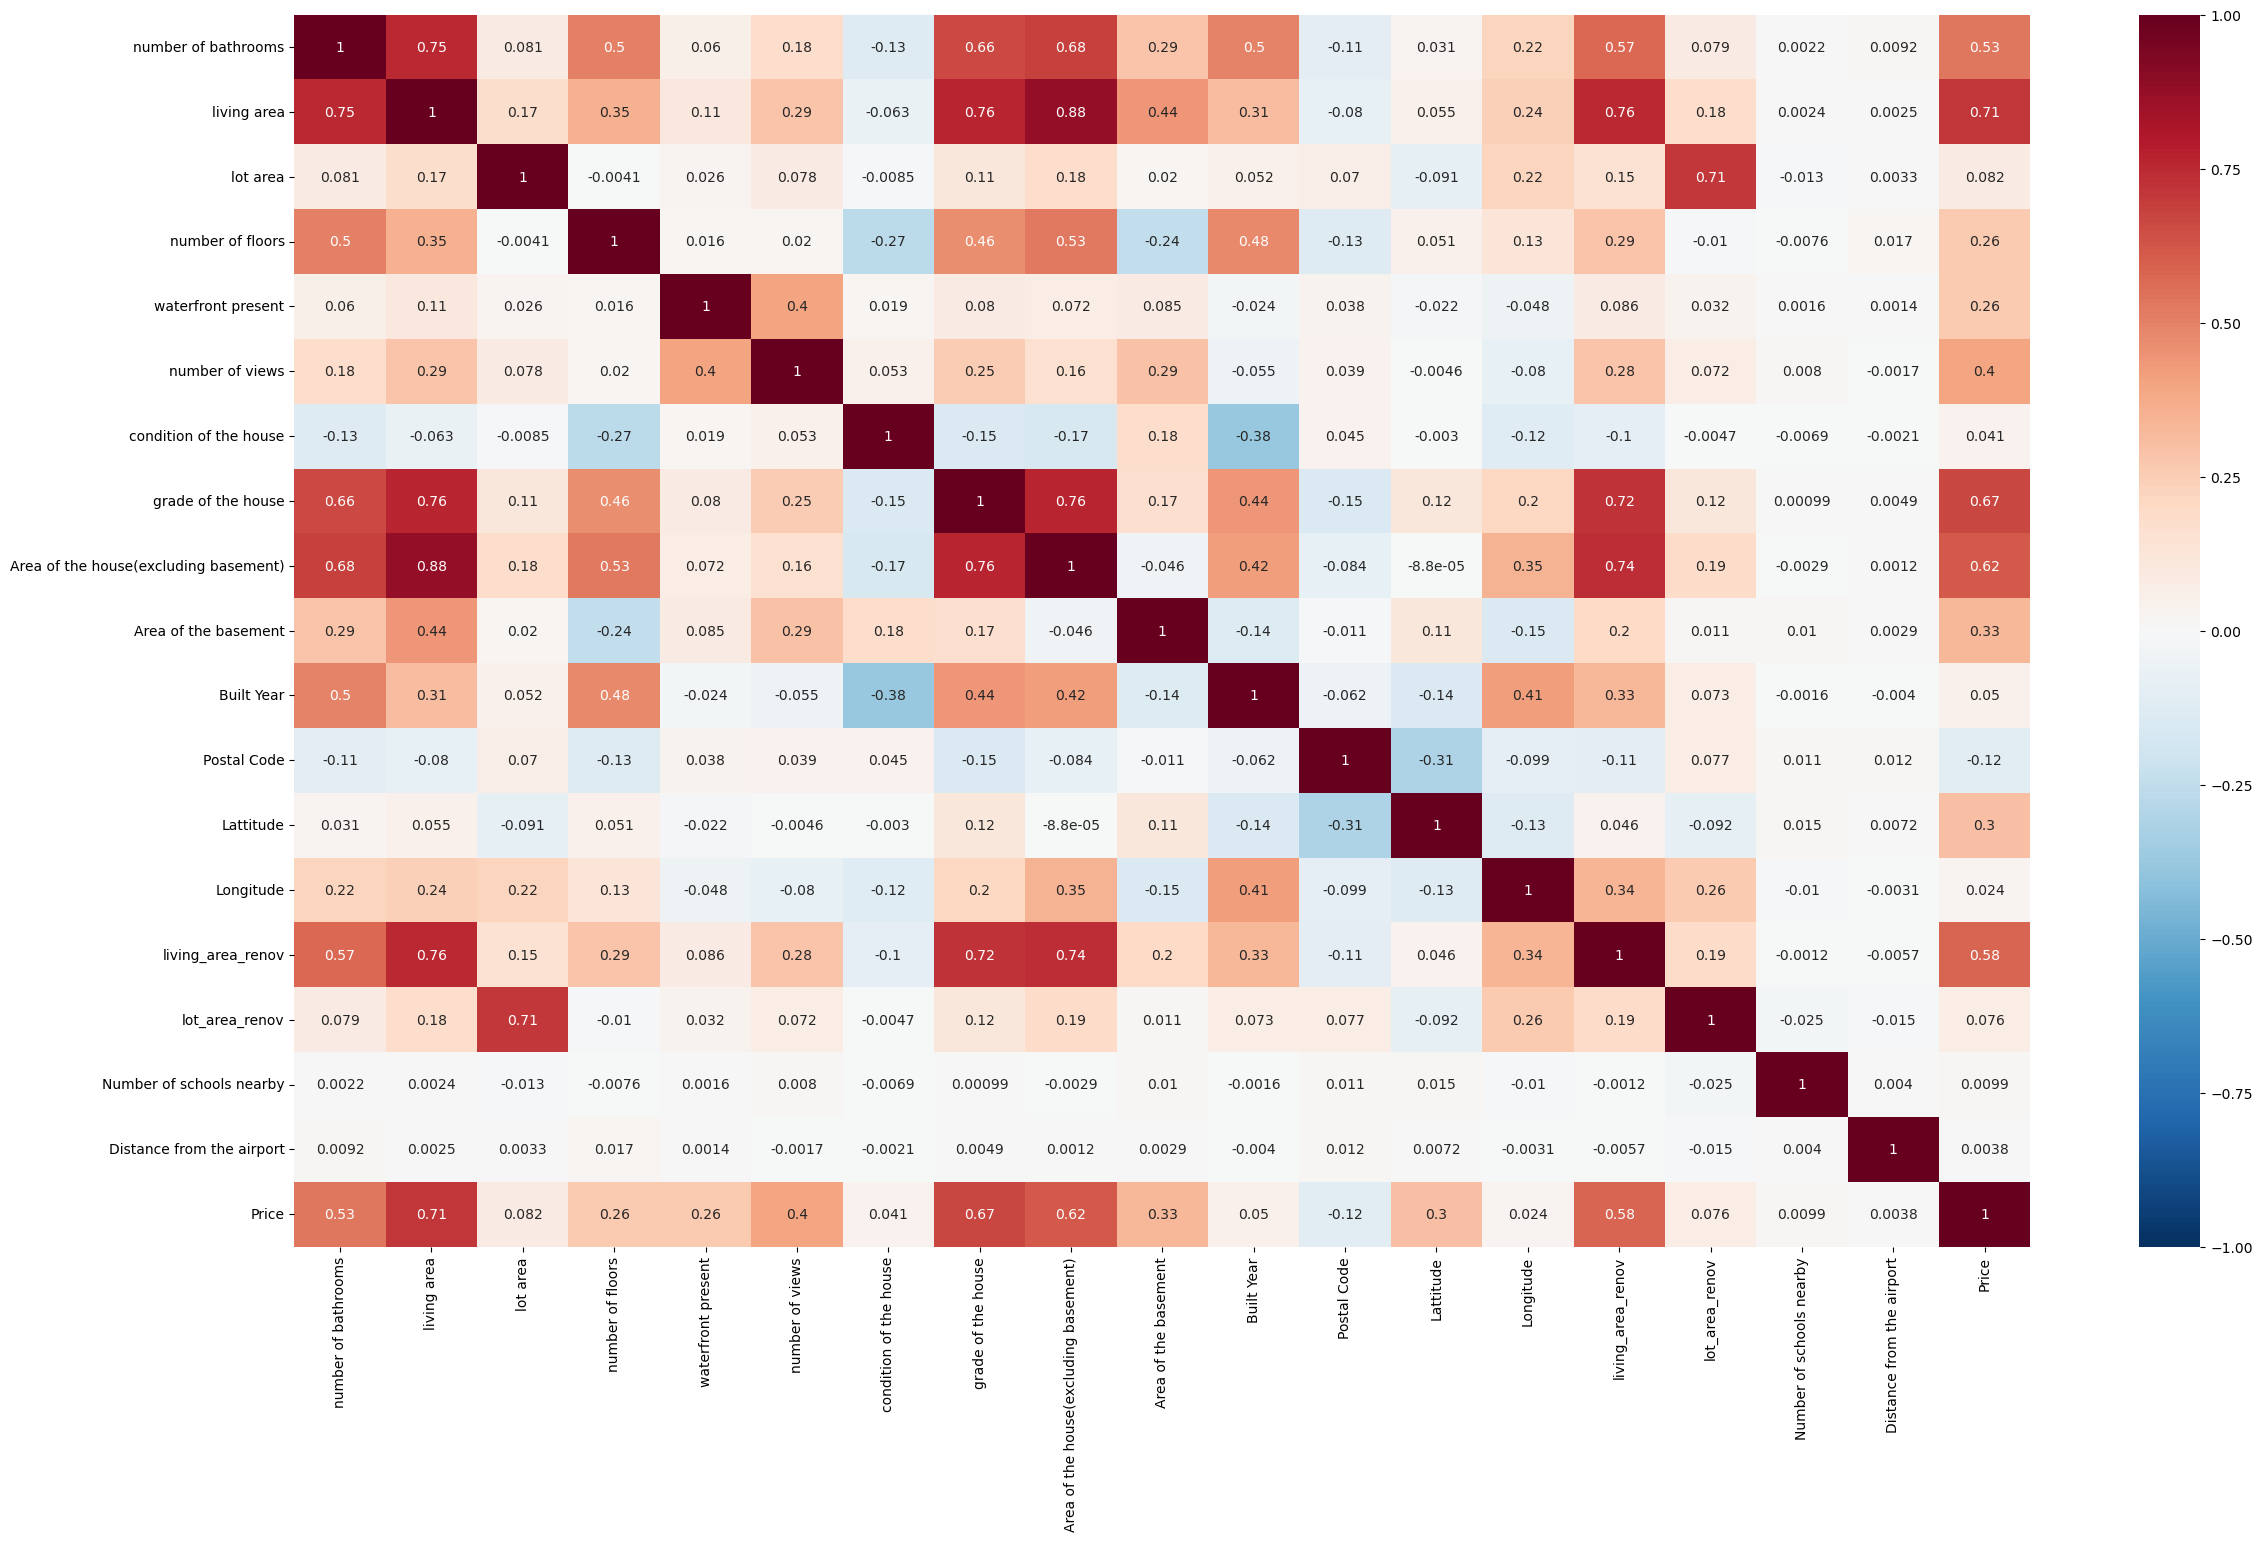

In [8]:
import seaborn as sns
plt.figure(figsize=(28,16))
sns.heatmap(
    df.iloc[:,1:].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [9]:
df.corr()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,0.300332,0.152954,-0.044156,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,0.287190,0.498127,-0.105546,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,0.441491,0.309602,-0.080303,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,0.019755,0.051615,0.070131,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,-0.242976,0.481565,-0.129788,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,0.071865,0.085441,-0.024226,0.038318,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,0.162672,0.293062,-0.055357,0.039268,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,-0.167695,0.180609,-0.381718,0.045334,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376
grade of the house,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,0.758222,0.167160,0.440358,-0.146342,0.115256,0.203754,0.720019,0.116725,0.000986,0.004940,0.671814
Area of the house(excluding basement),0.473599,0.684391,0.875793,0.183553,0.525643,0.071865,0.162672,-0.167695,0.758222,1.000000,-0.046445,0.419369,-0.083730,-0.000088,0.345899,0.737744,0.194670,-0.002894,0.001222,0.615220


In [10]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features=correlation(df,0.7)
len(set(corr_features))

6

In [12]:
corr_features.remove('Price')
corr_features

{'Area of the house(excluding basement)',
 'grade of the house',
 'living area',
 'living_area_renov',
 'lot_area_renov'}

In [13]:
df.drop(columns=corr_features,axis=1,inplace=True)
df.head()

,number of bedrooms,number of bathrooms,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the basement,Built Year,Postal Code,Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price
0,5,2.50,9050,2.0,0,4,5,280,1921,122003,52.8645,-114.557,2,58,2380000
1,4,2.50,4000,1.5,0,0,5,1010,1909,122004,52.8878,-114.470,2,51,1400000
2,5,2.75,9480,1.5,0,0,3,0,1939,122004,52.8852,-114.468,1,53,1200000
3,4,2.50,42998,2.0,0,0,3,0,2001,122005,52.9532,-114.321,3,76,838000
4,3,2.00,4500,1.5,0,0,4,830,1929,122006,52.9047,-114.485,1,51,805000


In [14]:
df.reset_index()
df.head()

,number of bedrooms,number of bathrooms,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the basement,Built Year,Postal Code,Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price
0,5,2.50,9050,2.0,0,4,5,280,1921,122003,52.8645,-114.557,2,58,2380000
1,4,2.50,4000,1.5,0,0,5,1010,1909,122004,52.8878,-114.470,2,51,1400000
2,5,2.75,9480,1.5,0,0,3,0,1939,122004,52.8852,-114.468,1,53,1200000
3,4,2.50,42998,2.0,0,0,3,0,2001,122005,52.9532,-114.321,3,76,838000
4,3,2.00,4500,1.5,0,0,4,830,1929,122006,52.9047,-114.485,1,51,805000


In [15]:
df.columns

Index(['number of bedrooms', 'number of bathrooms', 'lot area',
       'number of floors', 'waterfront present', 'number of views',
       'condition of the house', 'Area of the basement', 'Built Year',
       'Postal Code', 'Lattitude', 'Longitude', 'Number of schools nearby',
       'Distance from the airport', 'Price'],
      dtype='object')

In [16]:
def drop_outliers(df,column):
    iqr=1.5*(np.percentile(df[column],75)-np.percentile(df[column],25))
    df.drop(df[df[column]>(iqr+np.percentile(df[column],75))].index,inplace=True)
    df.drop(df[df[column]<(iqr+np.percentile(df[column],25)-iqr)].index,inplace=True)

---------------------- number of bedrooms -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


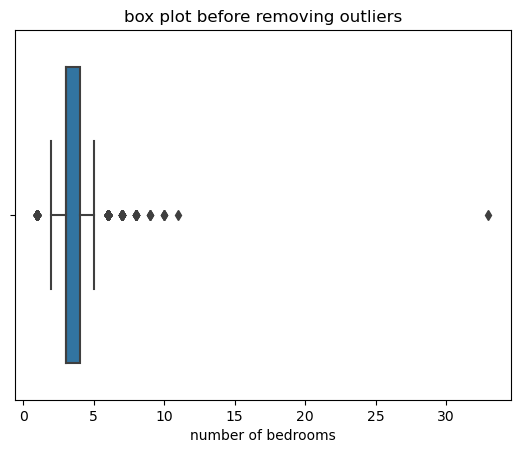

---------------------- number of bathrooms -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


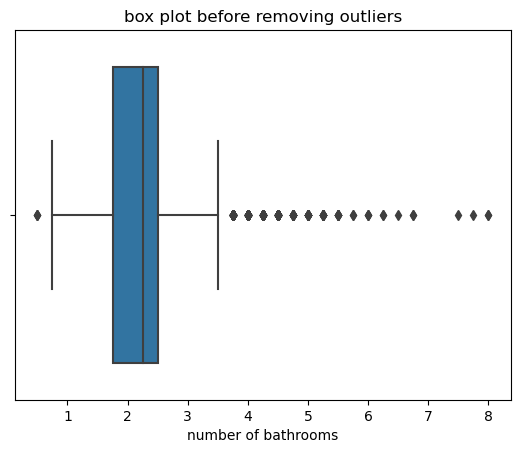

---------------------- lot area -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


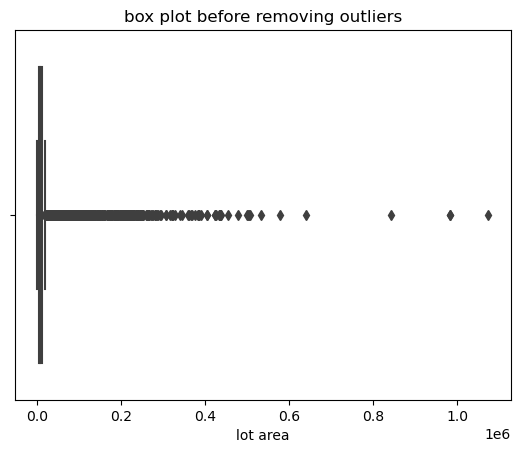

---------------------- number of floors -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


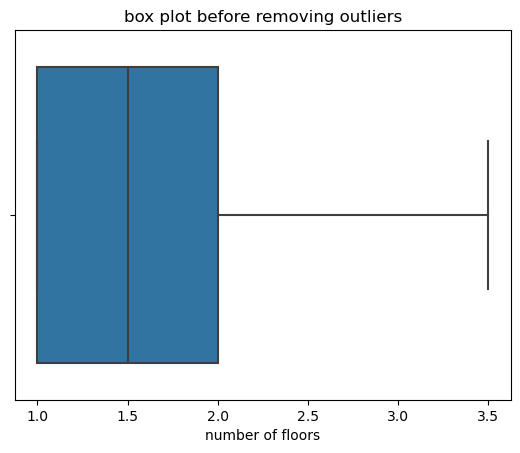

---------------------- waterfront present -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


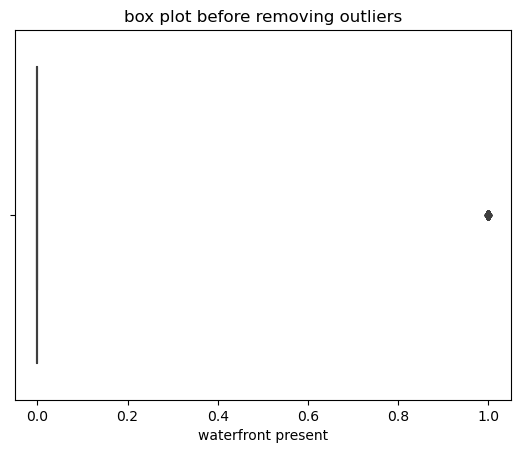

C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


---------------------- number of views -------------------------------


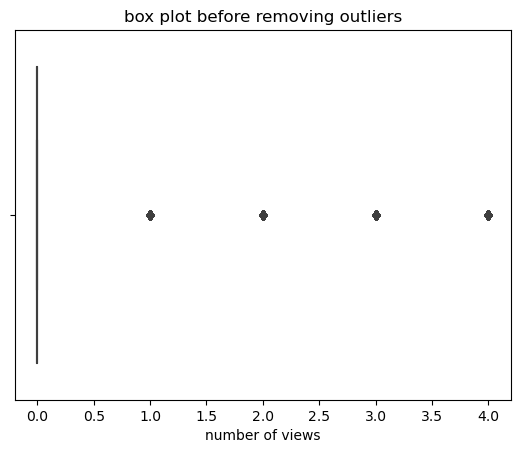

---------------------- condition of the house -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


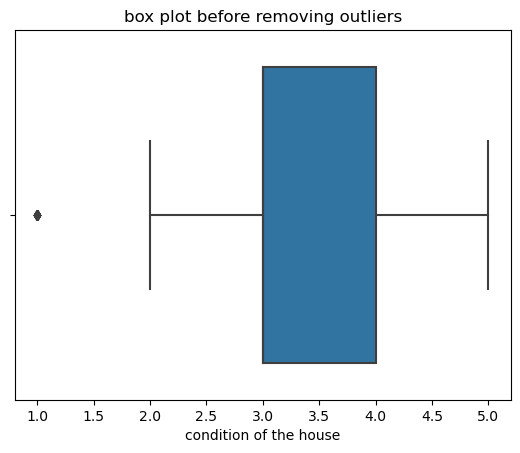

---------------------- Area of the basement -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


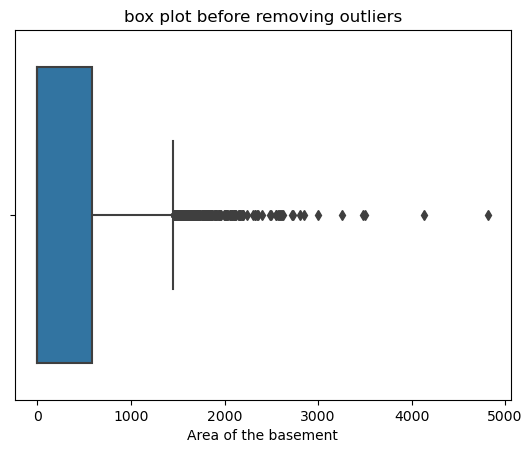

---------------------- Built Year -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


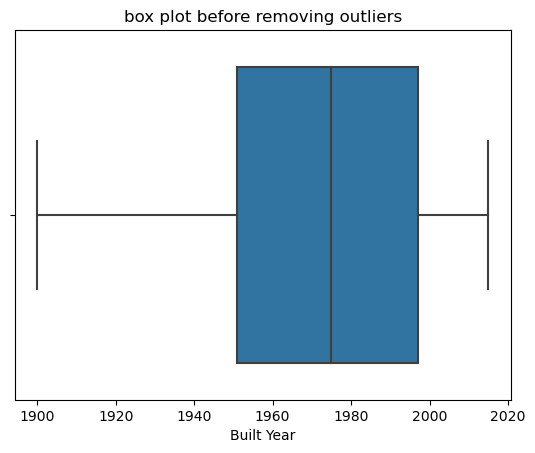

---------------------- Postal Code -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


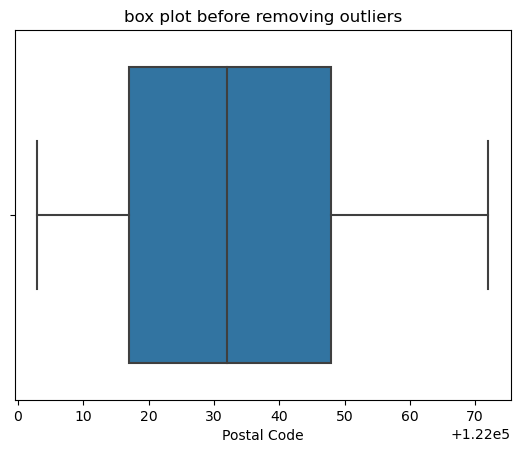

---------------------- Lattitude -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


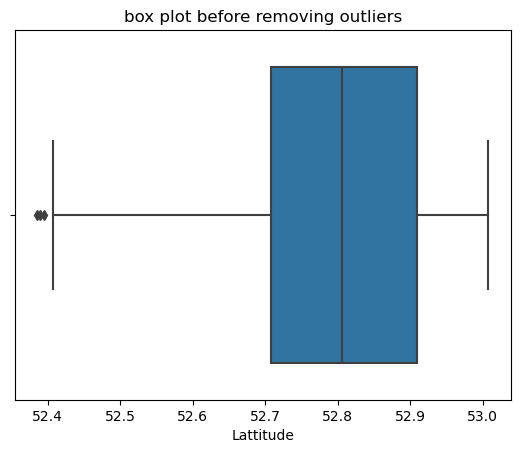

---------------------- Longitude -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


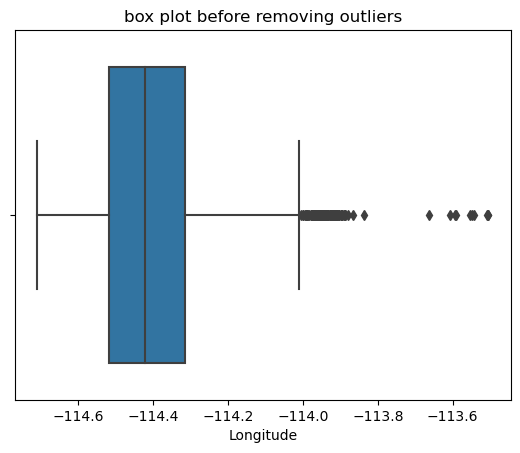

---------------------- Number of schools nearby -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


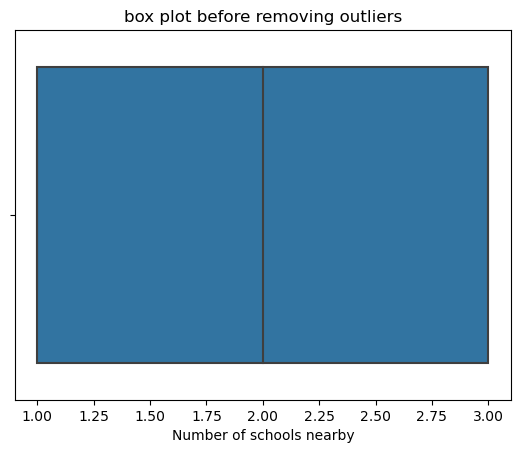

---------------------- Distance from the airport -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


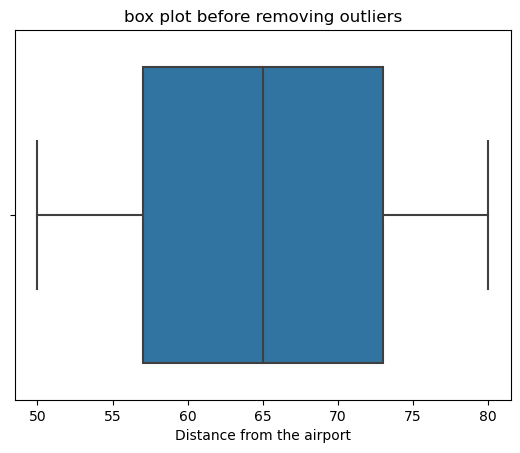

---------------------- Price -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


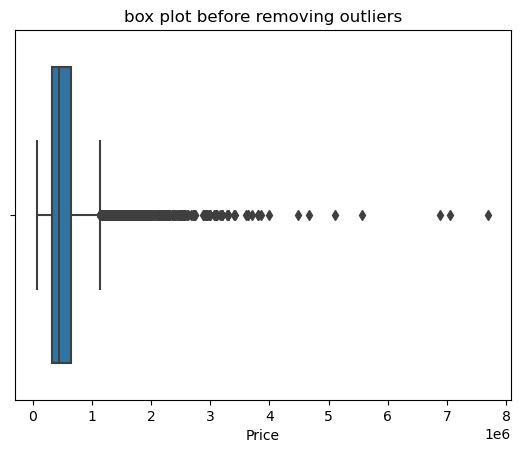

In [17]:
def boxplot_before(column):
    print('----------------------',column,'-------------------------------')
    sns.boxplot(df[column])
    plt.title('box plot before removing outliers')
    plt.show()
for i in df.columns:
    boxplot_before(i)

In [18]:
outliersColumns=['number of bedrooms','number of bathrooms','lot area','Area of the basement']
for i in outliersColumns:
    drop_outliers(df,i)

In [19]:
df.reset_index(inplace=True)

In [20]:
df.shape

(6665, 16)

In [21]:
df.head()

,index,number of bedrooms,number of bathrooms,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the basement,Built Year,Postal Code,Lattitude,Longitude,Number of schools nearby,Distance from the airport,Price
0,0,5,2.50,9050,2.0,0,4,5,280,1921,122003,52.8645,-114.557,2,58,2380000
1,2,5,2.75,9480,1.5,0,0,3,0,1939,122004,52.8852,-114.468,1,53,1200000
2,6,5,3.25,11995,2.0,0,2,3,0,2006,122008,52.7637,-114.050,3,72,785000
3,7,3,1.75,10578,2.0,0,0,5,690,1923,122006,52.9254,-114.482,3,71,750000
4,8,3,2.50,6550,1.0,0,2,4,950,1955,122009,52.8014,-114.598,1,73,750000


In [22]:
del df['index']

---------------------- number of bedrooms -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


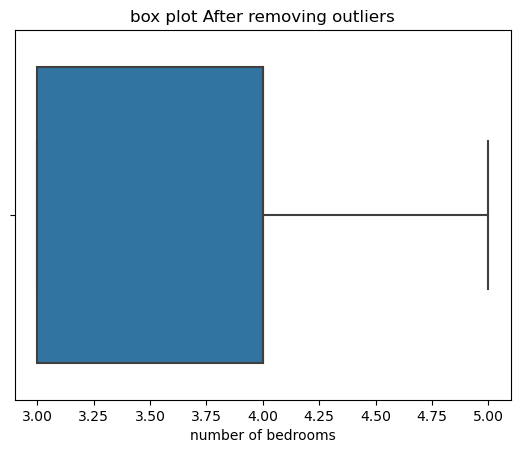

---------------------- number of bathrooms -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


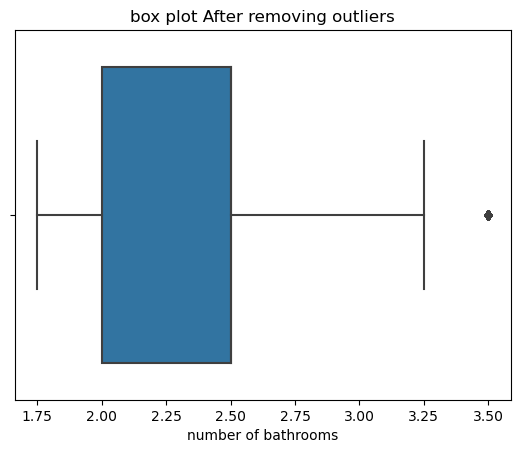

---------------------- lot area -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


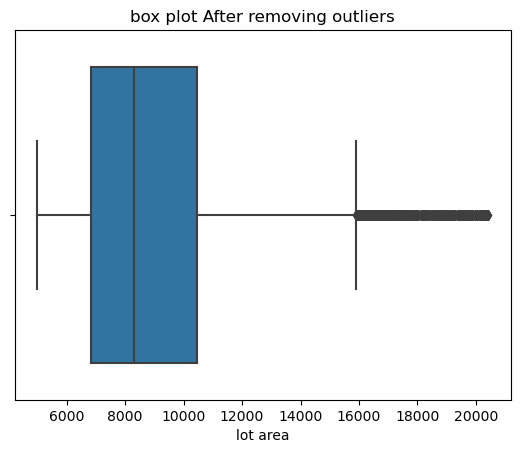

C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


---------------------- number of floors -------------------------------


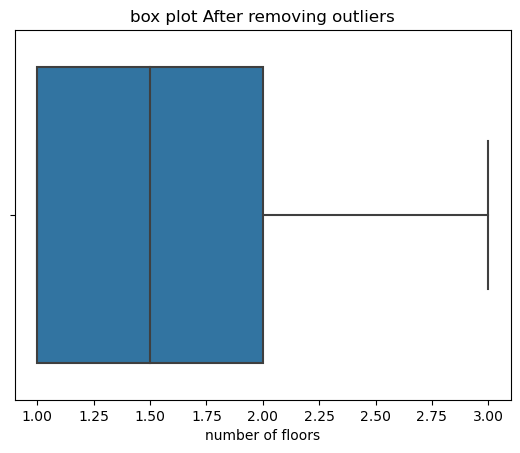

---------------------- waterfront present -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


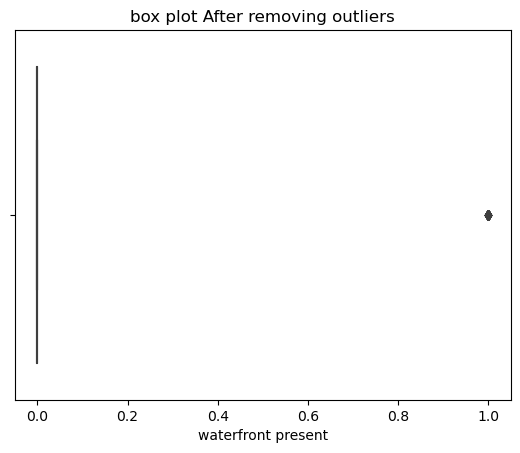

C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


---------------------- number of views -------------------------------


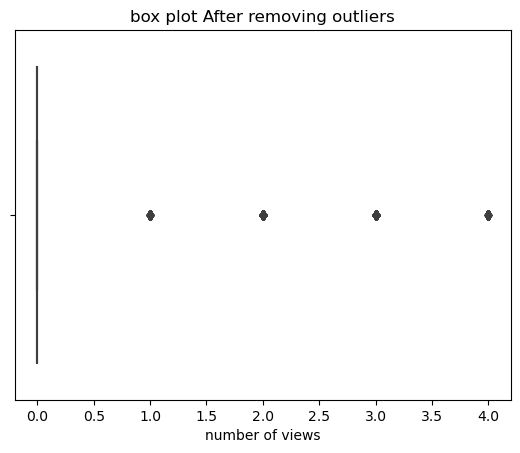

---------------------- condition of the house -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


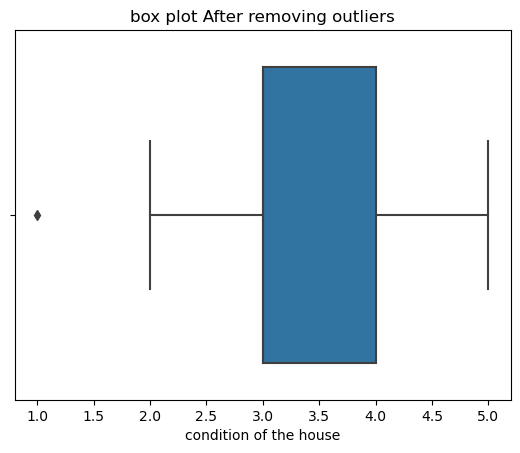

---------------------- Area of the basement -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


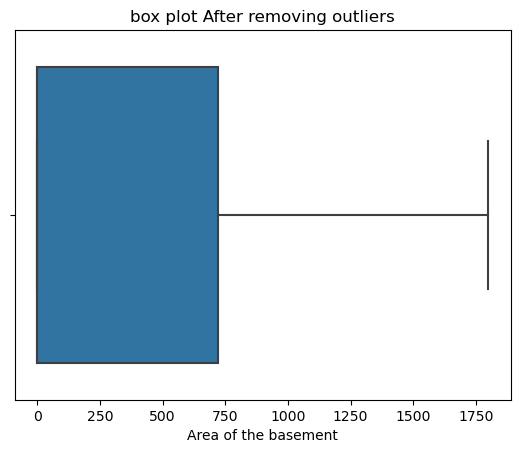

---------------------- Built Year -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


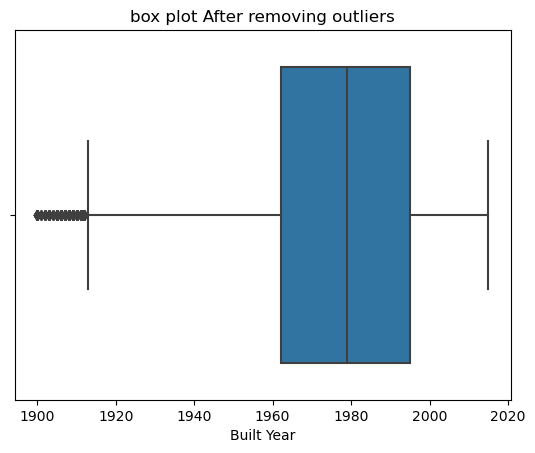

---------------------- Postal Code -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


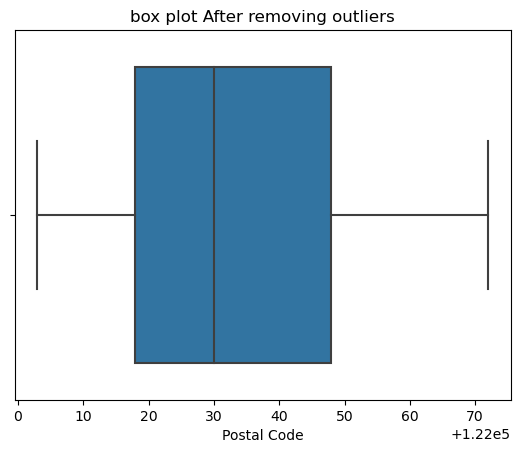

---------------------- Lattitude -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


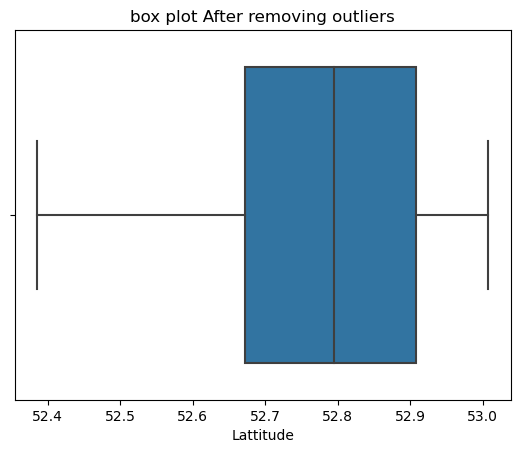

---------------------- Longitude -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


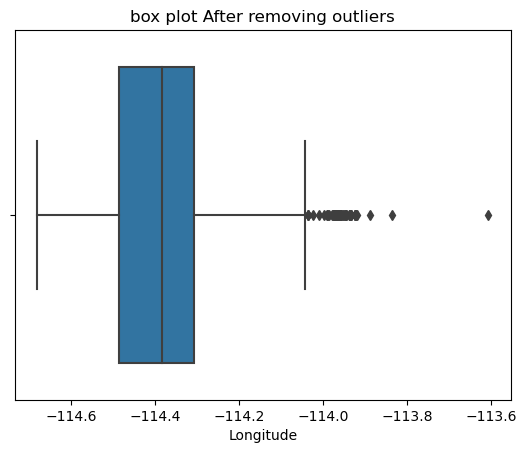

---------------------- Number of schools nearby -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


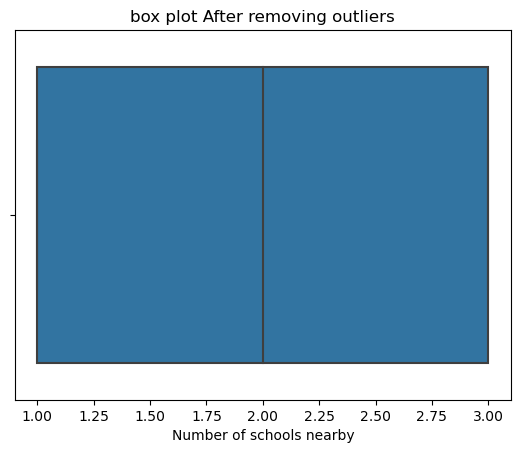

---------------------- Distance from the airport -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


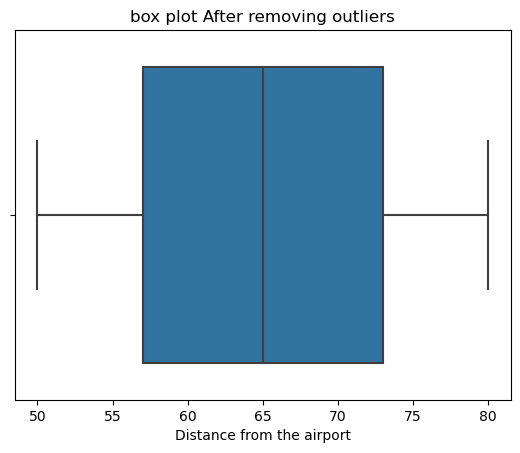

---------------------- Price -------------------------------


C:\Users\savar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


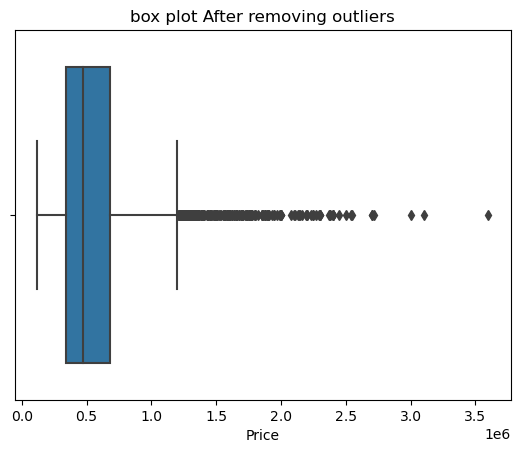

In [23]:
def boxplot_after(column):
    print('----------------------',column,'-------------------------------')
    sns.boxplot(df[column])
    plt.title('box plot After removing outliers')
    plt.show()
for i in df.columns:
    boxplot_after(i)

In [24]:
df.shape

(6665, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number of bedrooms         6665 non-null   int64  
 1   number of bathrooms        6665 non-null   float64
 2   lot area                   6665 non-null   int64  
 3   number of floors           6665 non-null   float64
 4   waterfront present         6665 non-null   int64  
 5   number of views            6665 non-null   int64  
 6   condition of the house     6665 non-null   int64  
 7   Area of the basement       6665 non-null   int64  
 8   Built Year                 6665 non-null   int64  
 9   Postal Code                6665 non-null   int64  
 10  Lattitude                  6665 non-null   float64
 11  Longitude                  6665 non-null   float64
 12  Number of schools nearby   6665 non-null   int64  
 13  Distance from the airport  6665 non-null   int64

In [26]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(y)

0       2380000
1       1200000
2        785000
3        750000
4        750000
         ...   
6660     330000
6661     272000
6662     261000
6663     240000
6664     219200
Name: Price, Length: 6665, dtype: int64


In [27]:
x.head()

,number of bedrooms,number of bathrooms,lot area,number of floors,waterfront present,number of views,condition of the house,Area of the basement,Built Year,Postal Code,Lattitude,Longitude,Number of schools nearby,Distance from the airport
0,5,2.50,9050,2.0,0,4,5,280,1921,122003,52.8645,-114.557,2,58
1,5,2.75,9480,1.5,0,0,3,0,1939,122004,52.8852,-114.468,1,53
2,5,3.25,11995,2.0,0,2,3,0,2006,122008,52.7637,-114.050,3,72
3,3,1.75,10578,2.0,0,0,5,690,1923,122006,52.9254,-114.482,3,71
4,3,2.50,6550,1.0,0,2,4,950,1955,122009,52.8014,-114.598,1,73


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(x_test)

In [31]:
d={'actual':y_test,'predicted':y_pred}
o_df=pd.DataFrame(d)
o_df.head()

,actual,predicted
5260,349000,478095.630501
944,375000,401297.752005
4916,330000,434537.463852
3558,360000,215306.244501
4376,551000,718575.697448


In [32]:
print('Training Score: ',model.score(x_train,y_train))
print('Testing Score: ',model.score(x_test,y_test))

Training Score:  0.501734651576618
Testing Score:  0.4797695211485812


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')
print(f'LinearRegression MSE score on the X_test is: {mean_squared_error(y_test, y_pred)}')
print('LinearRegression RMSE score on the X_test is', mean_squared_error(y_test, y_pred, squared = False))

LinearRegression MAE score on the X_test is: 158560.34165685708
LinearRegression MSE score on the X_test is: 60999877550.98082
LinearRegression RMSE score on the X_test is 246981.53281365152


In [34]:
import pickle as pkl

In [35]:
pkl.dump(model,open("houseprice.pkl","wb"))